In [51]:
#Importing the required python libraries
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [52]:
#Reading and importing the training and testing datasets
train=pd.read_csv('train.csv')
train_x=train.iloc[:,0].values
train_y=train.iloc[:,1].values
test=pd.read_csv('test.csv')
test_x=test.iloc[:,0].values
test_y=test.iloc[:,1].values

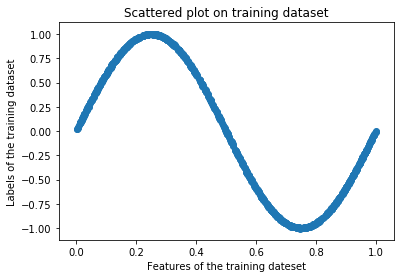

In [53]:
#plotting the scattered points of training dataset and saving it
plt.scatter(train_x,train_y)
plt.xlabel('Features of the training dateset')
plt.ylabel('Labels of the training dataset')
plt.title('Scattered plot on training dataset')
plt.savefig('Scattered plot on training dateset.png')

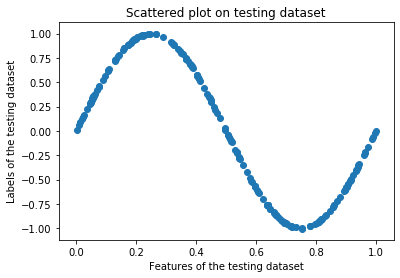

In [54]:
#plotting the scattered points of testing dataset and saving it
plt.scatter(test_x,test_y)
plt.xlabel('Features of the testing dataset')
plt.ylabel('Labels of the testing dataset')
plt.title('Scattered plot on testing dataset')
plt.savefig('Scattered plot on testing dateset.png')

In [55]:
def x_polynomial(n,x):
    x_nom=[]
    for i in range(len(x)):
        p=[]
        for j in range(n+1):
            p+=[x[i]**j]
        x_nom.append(p)
    return np.array(x_nom)

In [56]:
def hypothesis(theta,x):
    return np.dot(x,theta)

In [57]:
def min_squ_error(theta,x,y):
    ans=0
    ans+=hypothesis(theta,x)
    error=np.mean((ans-y)**2)
    error/=2
    return error

In [58]:
def gradient_descent(theta,x,y):
    ans=0
    ans+=hypothesis(theta,x)
    ans-=y
    ans= x.transpose()*ans
    return np.mean(ans,axis=1)

In [59]:
def regression(theta,x,y,alpha,cutoff=1e-6):
    error1=0
    while True:
        next_error=min_squ_error(theta,x,y)
        if abs(next_error-error1)<=cutoff:
            break
        error1=next_error
        gradient=alpha*gradient_descent(theta,x,y)
        theta=np.subtract(theta, gradient)
    return theta

[ 0.88762961 -1.8043017 ]


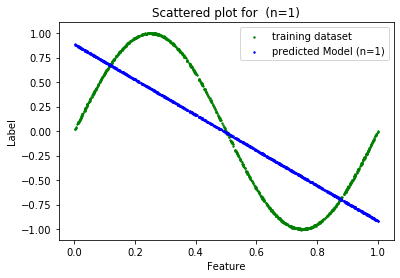

[ 0.8381672  -1.50420136 -0.29697545]


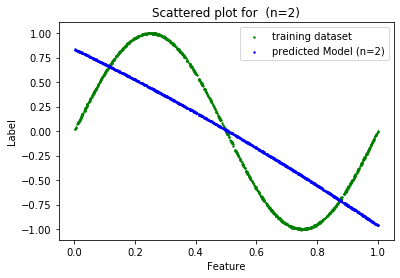

[ 1.02573897 -2.16576034 -0.73830216  1.14689095]


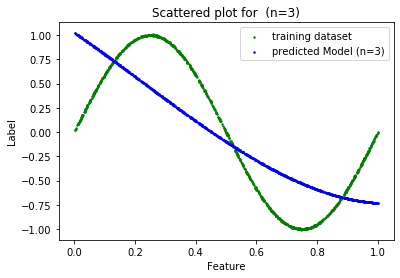

[ 0.74357148  1.0005935  -5.68385814 -2.14731915  5.87836459]


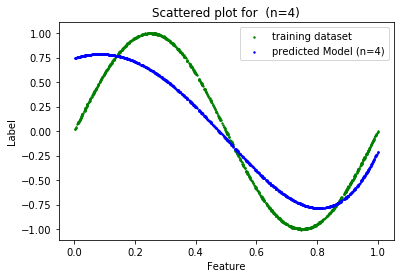

[ 0.67603789  1.29297737 -4.72996912 -2.65593081 -0.12173112  5.60497966]


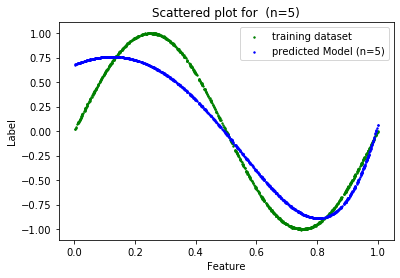

[ 0.67951956  1.05314196 -3.65733086 -3.09710417 -0.03677201  1.40536966
  3.87691117]


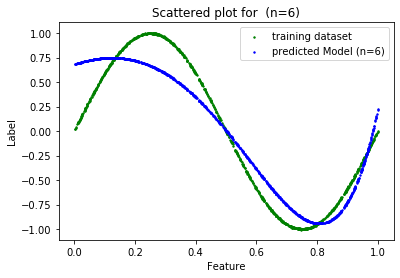

[ 0.71755659  0.57190982 -2.80559902 -2.04651037 -0.95043342 -0.8847355
  3.18041037  2.56651827]


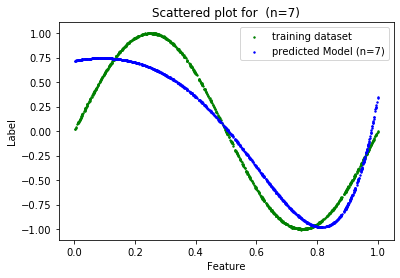

[ 0.7339907   0.36649937 -2.27398316 -2.26596192 -1.45053872  0.17859977
  2.70388552  0.60545146  1.80175794]


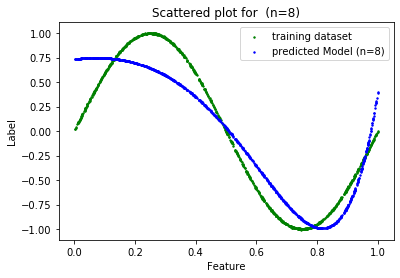

[ 0.72465845  0.57081512 -3.0854017  -1.76331838 -0.40821959  0.2565644
  0.69120728  1.98502591  0.02753908  1.4263406 ]


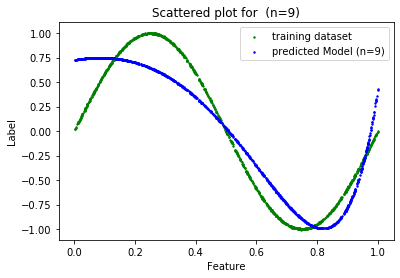

[0.0953578085551921, 0.0957253297959334, 0.08921928200289711, 0.03896773476206802, 0.027979472203325983, 0.027214883319184917, 0.03066417318788674, 0.03224941951968146, 0.03249460194964814]


<Figure size 432x288 with 0 Axes>

In [60]:
train_error=[]
test_error=[]
for i in [1,2,3,4,5,6,7,8,9]:
    x1_train=x_polynomial(i,train_x)
    x1_test=x_polynomial(i,test_x)
    coef=np.random.randn(i+1)
    theta=regression(coef,x1_train,train_y,0.05)
    print(theta)
    train_error.append(np.mean((np.dot(x1_train, theta) - train_y)**2)/2)
    test_error.append(np.mean((np.dot(x1_test, theta) - test_y)**2)/2)
    plt.scatter(train_x,train_y,color='green',marker='o',label='training dataset',s=2)
    plt.scatter(train_x,np.dot(x1_train, theta),color='blue',marker='o',label='predicted Model (n='+str(i)+')',s=2)
    plt.xlabel('Feature')
    plt.ylabel('Label')
    plt.legend()
    plt.title('Scattered plot for  (n='+str(i)+')')
    plt.savefig('Scattered plot on predicted values for Model (n='+str(i)+') .png')
    plt.show()
    plt.clf()
print(test_error)

In [61]:
print(test_error)
print(train_error)

[0.0953578085551921, 0.0957253297959334, 0.08921928200289711, 0.03896773476206802, 0.027979472203325983, 0.027214883319184917, 0.03066417318788674, 0.03224941951968146, 0.03249460194964814]
[0.09982320797184652, 0.10081922957909807, 0.09063850061362867, 0.03804376576089523, 0.02666288301404303, 0.025705710756341007, 0.028890646459845192, 0.030359188899141205, 0.030612376969131435]


In [62]:
from numpy import asarray
from numpy import savetxt
savetxt('test_error for Model 1 to 9.csv', test_error, delimiter=',')
savetxt('train_error for Model 1 to 9.csv', train_error, delimiter=',')

In [63]:
print(test_error)

[0.0953578085551921, 0.0957253297959334, 0.08921928200289711, 0.03896773476206802, 0.027979472203325983, 0.027214883319184917, 0.03066417318788674, 0.03224941951968146, 0.03249460194964814]


In [64]:
print(train_error)

[0.09982320797184652, 0.10081922957909807, 0.09063850061362867, 0.03804376576089523, 0.02666288301404303, 0.025705710756341007, 0.028890646459845192, 0.030359188899141205, 0.030612376969131435]


C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


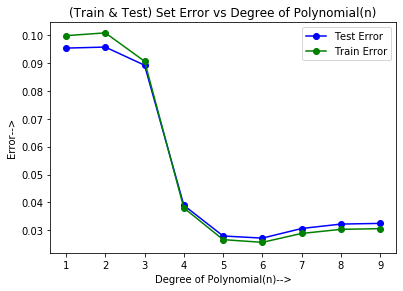

In [65]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(range(1,10),test_error,color='blue',marker='o',label='Test Error')
axes.plot(range(1,10),train_error,color='green',marker='o',label='Train Error')
axes.set_xlabel('Degree of Polynomial(n)-->')
axes.set_ylabel('Error-->')
axes.set_title('(Train & Test) Set Error vs Degree of Polynomial(n)')
axes.legend()
plt.tight_layout()
plt.show()
fig.savefig('Training and Test Error.png')

In [66]:
def min_squ_error1(theta,x,y,param,regtype):
    if(regtype==1):
        return min_squ_error(theta,x,y)+param*(np.sum(abs(theta)))
    elif(regtype==2):
        return min_squ_error(theta,x,y)+param*(np.sum(theta**2))

In [67]:
def gradient_descent1(theta,x,y,param,regtype):
    return gradient_descent(theta,x,y)

In [68]:
def regression1(theta,x,y,alpha,param,regtype,cutoff=1e-6):
    error1=0
    m=len(x)
    while True:
        next_error=min_squ_error1(theta,x,y,param,regtype)
        if abs(next_error-error1)<=cutoff :
            break
        error1=next_error
        gradient=gradient_descent1(theta,x,y,param,regtype)
        for i in range(len(theta)):
            ans=0
            if(regtype==1):
                if(theta[i]<0):
                    ans+=(-1*param)
                else:
                    ans+=param
            elif(regtype==2):
                ans+=(2*param*theta[i])
            ans+=gradient[i]
            ans*=alpha
            theta[i]-=ans
    return theta  

In [69]:
train_error_lasso=[]
test_error_lasso=[]
final_theta=[]
for i in [2,6]:
    x1_train=x_polynomial(i,train_x)
    m=len(x1_train)
    x1_test=x_polynomial(i,test_x)
    train_param=[]
    test_param=[]
    for j in [0.25,0.5,0.75,1]:
        theta=np.random.randn(i+1)
        theta=regression1(theta,x1_train,train_y,0.05,j,1)
        train_param.append(np.mean((np.dot(x1_train,theta)-train_y)**2)/2+j*np.sum(abs(theta))/(2*m))
        test_param.append(np.mean((np.dot(x1_test,theta)-test_y)**2)/2+j*np.sum(abs(theta))/(2*m))
        final_theta.append(theta)
    train_error_lasso.append(train_param)
    test_error_lasso.append(test_param)
print(test_error_lasso)

[[0.2273744057018804, 0.23123117200036117, 0.22407302254150507, 0.22228496116628182], [0.223703877805665, 0.22812203001460504, 0.23393322982474604, 0.22074200827614768]]


In [70]:
print(train_error_lasso)
print(test_error_lasso)

[[0.2490399762561187, 0.25413263585608464, 0.2460031355224531, 0.24412939666433683], [0.24446562963567742, 0.2503409508807813, 0.25799935882753144, 0.23975051048475787]]
[[0.2273744057018804, 0.23123117200036117, 0.22407302254150507, 0.22228496116628182], [0.223703877805665, 0.22812203001460504, 0.23393322982474604, 0.22074200827614768]]


C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


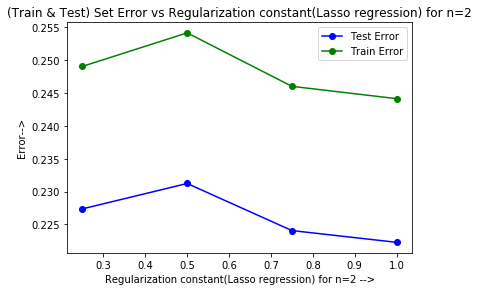

In [71]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot([0.25,0.5,0.75,1],test_error_lasso[0],color='blue',marker='o',label='Test Error')
axes.plot([0.25,0.5,0.75,1],train_error_lasso[0],color='green',marker='o',label='Train Error')
axes.set_xlabel('Regularization constant(Lasso regression) for n=2 -->')
axes.set_ylabel('Error-->')
axes.set_title('(Train & Test) Set Error vs Regularization constant(Lasso regression) for n=2')
axes.legend()
plt.tight_layout()
plt.show()
fig.savefig('test_error_lasso for n=2.png')

C:\Users\praveen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


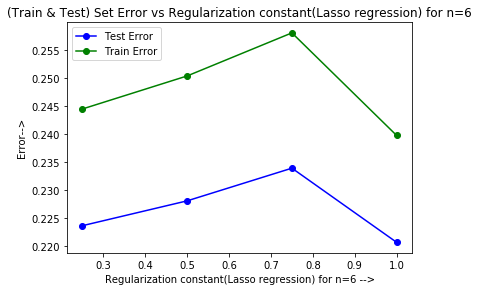

In [72]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot([0.25,0.5,0.75,1],test_error_lasso[1],color='blue',marker='o',label='Test Error')
axes.plot([0.25,0.5,0.75,1],train_error_lasso[1],color='green',marker='o',label='Train Error')
axes.set_xlabel('Regularization constant(Lasso regression) for n=6 -->')
axes.set_ylabel('Error-->')
axes.set_title('(Train & Test) Set Error vs Regularization constant(Lasso regression) for n=6')
axes.legend()
plt.tight_layout()
plt.show()
fig.savefig('test_error_lasso for n=6.png')